In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.stats as ss
import os

#variable
SUMMARY = '/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/LR_SummaryTest_Table.tsv'
TSS = '/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/Merged_Causality_TSS_TSS.tab'
ANNOT =  "/storage/mgymrek/gtex/annotations/encode/"
GENEANNOT='/storage/resources/dbase/human/hg19/gencode_gene_annotations_hg19.csv'
TF_ANNOT = '/storage/mgymrek/gtex/tfbs/encodedata/'
ANNOTDIR = "/storage/mgymrek/gtex/annotations/"

SHORTEN = {
    "Artery-Aorta":"Artery.A"     ,
    "Artery-Tibial": "Artery.T",
    "Adipose-Subcutaneous": "Adipose.S",    
    "Adipose-Visceral":"Adipose.V",
    "Brain-Caudate":"Caudate"   , 
    "Brain-Cerebellum":"Cerebellum",
    "Cells-Transformedfibroblasts": "Fibroblast",
    "Esophagus-Mucosa": "Mucosa",
    "Esophagus-Muscularis":"Muscularis",
    "Heart-LeftVentricle":"Heart",
    "Lung": "Lung",
    "Muscle-Skeletal": "Muscle",
    "Nerve-Tibial":"Nerve",
    "Skin-NotSunExposed": "SkinUnexposed",
    "Skin-SunExposed":"SkinLeg",
    "Thyroid":"Thyroid",
    "WholeBlood": "Blood"
}
TISSUES = sorted([item for item in list(SHORTEN.keys()) if item != "permuted"])
COLORS = {
    "Artery-Aorta":"salmon",
    "Artery-Tibial": "red",
    "Adipose-Subcutaneous": "darkorange",    
    "Adipose-Visceral":"orange",
    "Brain-Caudate":"lemonchiffon"   , 
    "Brain-Cerebellum":"yellow",
    "Cells-Transformedfibroblasts": "skyblue",
    "Esophagus-Mucosa": "sienna",
    "Esophagus-Muscularis":"burlywood",
    "Heart-LeftVentricle":"darkviolet",
    "Lung": "greenyellow",
    "Muscle-Skeletal": "mediumslateblue",
    "Nerve-Tibial":"gold",
    "Skin-NotSunExposed":"blue",
    "Skin-SunExposed":"cornflowerblue",
    "Thyroid":"green",
    "WholeBlood": "m",
    "permuted": "gray"
}

def get_intersect(Path, allstrstested):
    #intersect with strong enhancers
    command = "bedtools intersect -a %s -b %s -wa > Intersect.bed"%(allstrstested,Path)
    value = os.system(command)
    data = pd.read_csv('Intersect.bed', sep='\t', names=["chrom","start","end","gene"]).drop_duplicates()
    feature_loci = set(data.apply(lambda x: x["chrom"]+":"+str(x["start"]), 1))
    return(data, feature_loci)
    

sep='"\t"'
OUTPATH = "../pdfs"
PREFIX = "SupllFigure" # Keep as a variable in case we move things around!

#command = "cat %s |awk -F'\t' '{print $1%s$2%s$75%s$4}' | uniq > all_analyzed_strs.tab"%(SUMMARY, sep,sep,sep)
#value = os.system(command)

In [11]:
#All STRs
allstrs = pd.read_csv(SUMMARY, sep='\t')
allstrs['locus']=allstrs.apply(lambda x: x["chrom"]+":"+str(x["str.start"]), 1)
estrs = allstrs.loc[allstrs['E.tissues']>=1] 
print(allstrs.shape, 'All loci:', len(set(allstrs['locus'])) , estrs.shape, 'eSTR loci:',len(set(estrs['locus'])))
allstrstested='all_analyzed_strs.tab'

(307187, 78) All loci: 125758 (25619, 78) eSTR loci: 20192


In [10]:
ANNOTDIR = "/storage/mgymrek/gtex/annotations/"
##==============================================================Features
##                             enhancers
"""
FEATURES = ["Strong_Enhancer","Weak_Enhancer"]
enhancer = {
    'Strong_Enhancer': os.path.join(ANNOT,"%s_GM12878.bed"%FEATURES[0]),
    'Weak_Enhancer': os.path.join(ANNOT,"%s_GM12878.bed"%FEATURES[1])
          }
Path_to_feature = [enhancer[s] for s in FEATURES]
"""
#================================================================
#                              Other features POLR2A TFs
"""
#FEATURES = ['H3K79me2',"H3K4me3","MLLT1","EP300","HCFC1"]
FEATURES = ['POLR2A', "POLR2AphosphoS2","POLR2AphosphoS5"]
Path_to_feature = [os.path.join(TF_ANNOT,"%s_GM12878.bed.gz"%FEATURES[s]) for s in range(len(FEATURES))]
"""
#================================================================
#                              Histones
'''
FEATURES=['histone']
Path_to_feature=[os.path.join(ANNOTDIR, "Histones.bed")]
'''
#================================================================
#                             Gene location
'''
FEATURES=['1k_promoter']
Path_to_feature=[os.path.join(ANNOTDIR, "hg19_promoter_1kb.bed")]
'''
#================================================================
#                             Gene location
"""
geneloc = {
    "introns": os.path.join(ANNOTDIR, "introns.bed"),
    "3'utr": os.path.join(ANNOTDIR, "3utr.bed"),
    "5'utr": os.path.join(ANNOTDIR, "5utr.bed"),
    "Coding (CDS)": os.path.join(ANNOTDIR, "coding.bed")
           }
FEATURES = sorted(geneloc.keys())
Path_to_feature = [geneloc[FEATURES[s]] for s in range(len(FEATURES))]
"""
##
#================================================================

s=0
for F in Path_to_feature:
    feature=FEATURES[s]
    intersect,feature_loci = get_intersect(F, allstrstested)
    allstrs[feature] = np.where(allstrs["locus"].isin(feature_loci), 1, 0)
    s=s+1 

In [3]:
#choose feature and get intersection
#Change field name

feature="All_eSTRs"
feature_set=allstrs.loc[allstrs['E.tissues']>=0]

#feature="Enhancers"                 
#feature_set = allstrs.loc[((allstrs[FEATURES[0]]==1)|allstrs[FEATURES[1]]==1)].copy()

#feature="all POLR2A state"                 
#feature_set = allstrs.loc[((allstrs[FEATURES[0]]==1)|allstrs[FEATURES[1]]==1)|(allstrs[FEATURES[2]]==1)].copy()

#feature = FEATURES[0]         
#feature_set = allstrs.loc[allstrs[feature]==1].copy()
print(feature,feature_set.shape)

All_eSTRs (307187, 78)


In [12]:
#Evaluating overall enrichment
#enhan = allstrs.loc[(allstrs['inter_strong']==1)|(allstrs['inter_weak']==1)].copy()

E_feature = feature_set.loc[feature_set['E.tissues']>=1].copy()
motif_list = list(set(E_feature['motif']))

locus=len(set(allstrs['locus']))
eSTR=len(set(estrs['locus']))
locus_enh = len(set(feature_set['locus']))
estr_enh_locus = len(set(E_feature['locus'])) 
odd_f, pv_f = ss.fisher_exact([[estr_enh_locus,eSTR-estr_enh_locus],[locus_enh-estr_enh_locus, locus-eSTR-(locus_enh-estr_enh_locus)]])
print(odd_f,pv_f)

odds=[]
pval=[]
count=[]
Motifs=[]

#overall enrichment #66 eSTRs motifs 
for motif in motif_list:
    me = len(set(E_feature.loc[E_feature['motif']==motif]["locus"]))
    if me < 10:
        #print(motif,me)
        continue
    mne= len(set(E_feature["locus"])) - me
    nme= len(set(feature_set.loc[feature_set['motif']==motif]["locus"]))-me
    nmne= locus_enh-len(set(feature_set.loc[feature_set['motif']==motif]['locus']))-(mne) 
    #print([me,mne],[nme,nmne])    
    OR, p = ss.fisher_exact([[me,mne],[nme,nmne]])
    
    odds.append(np.log2(OR))
    pval.append(p) #(-np.log10(p))
    count.append((len(set(feature_set.loc[feature_set['motif']==motif]['locus'])), me))
    Motifs.append(motif)

data1=pd.DataFrame.from_dict({'motif':Motifs, 'OR':odds, 'pvalue':pval, 'Counts':count}).sort_values('pvalue')
data1.index=list(data1['motif'])
print(len(motif_list), len(Motifs))
data1.head(5)

nan 1.0
192 46


,Counts,OR,motif,pvalue
AC,"(33499, 4395)",-0.452190,AC,1.024363e-67
AGAT,"(2012, 187)",-0.912233,AGAT,7.876930e-19
AAAC,"(5930, 1171)",0.383013,AAAC,1.095557e-14
AAAT,"(6732, 1310)",0.357734,AAAT,2.569112e-14
CCG,"(196, 66)",1.411261,CCG,1.190121e-09


In [13]:
#Evaluating enrichment in tissues

data = data1.copy()
enrich_tissues = {}
enrich_tissues['motif']=Motifs

Num=0
for T in TISSUES:
    E_feature = feature_set.loc[feature_set['eSTR.%s'%SHORTEN[T]]>=1].copy()
    locus=len(set(allstrs.loc[allstrs['eSTR.%s'%SHORTEN[T]]>=0]['locus']))
    eSTR=len(set(estrs['locus']))
    locus_enh = len(set(feature_set['locus']))
    estr_enh_locus = len(set(E_feature['locus']))  
    odds=[]
    pval=[]
    count=[]
    colors=[]
    alpha=0.05/(len(list(data['motif']))-40)
    for motif in list(data['motif']):
        me = len(set(E_feature.loc[E_feature['motif']==motif]['locus']))
        if me==0:
            odds.append(0); Num=Num+1
            pval.append(1)
            colors.append('white')
            count.append((feature_set.loc[feature_set['motif']==motif].shape[0], me))
            continue
            
        mne= estr_enh_locus - me
        nme= len(set(feature_set.loc[feature_set['motif']==motif]['locus']))-me  #len(set(feature_set.loc[feature_set['motif']==motif]['locus']))
        nmne=locus_enh-(nme+me)-(mne) 
        OR, p = ss.fisher_exact([[me,mne],[nme,nmne]])
        odds.append(np.log2(OR))
        pval.append(p) #(-np.log10(p))
        count.append((nme+me, me))
        if (OR>1 and p<alpha) : colors.append(COLORS[T])               #alpha is corrected
        else:  colors.append('white')

#        if motif=='AGAT':
#        print(motif,': ',me, ' P(OR)',p,'(',OR,')','...',SHORTEN[T])
    D=pd.DataFrame.from_dict({'motif':Motifs, 'OR':odds, 'pvalue':pval, 'Counts':count})
    D.index=list(D['motif'])
    D['color']= colors
    data[SHORTEN[T]] = colors
    #print(data.loc['AGAT',:])
    
data2=data.copy()
print(Num, alpha)
data.head(5) 

39 0.008333333333333333


,Counts,OR,motif,pvalue,Adipose.S,Adipose.V,Artery.A,Artery.T,Caudate,Cerebellum,...,Mucosa,Muscularis,Heart,Lung,Muscle,Nerve,SkinUnexposed,SkinLeg,Thyroid,Blood
AC,"(33499, 4395)",-0.452190,AC,1.024363e-67,white,white,white,white,white,white,...,white,white,white,white,white,white,white,white,white,white
AGAT,"(2012, 187)",-0.912233,AGAT,7.876930e-19,white,white,white,white,white,white,...,white,white,white,white,white,white,white,white,white,white
AAAC,"(5930, 1171)",0.383013,AAAC,1.095557e-14,darkorange,orange,white,red,white,yellow,...,sienna,burlywood,darkviolet,white,mediumslateblue,gold,white,cornflowerblue,green,m
AAAT,"(6732, 1310)",0.357734,AAAT,2.569112e-14,darkorange,white,salmon,red,white,white,...,sienna,white,white,white,mediumslateblue,gold,white,cornflowerblue,green,m
CCG,"(196, 66)",1.411261,CCG,1.190121e-09,darkorange,orange,white,red,lemonchiffon,white,...,sienna,burlywood,darkviolet,greenyellow,mediumslateblue,gold,blue,cornflowerblue,green,m


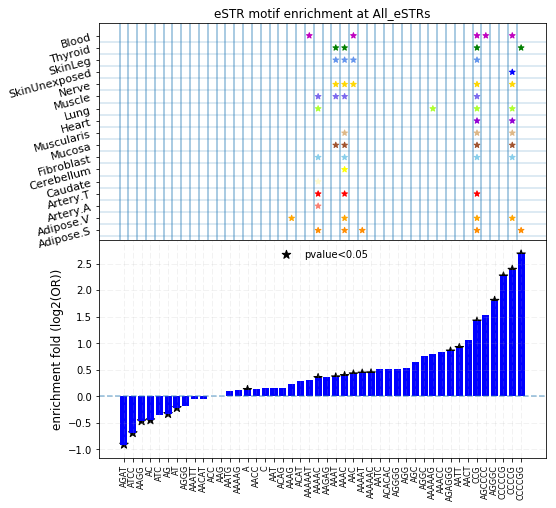

In [6]:
# Plotting enrichment
data=data2.copy()
data=data.sort_values('OR',ascending=True)
X=[i for i in range(data.shape[0])]

fig = plt.figure(figsize=(8,8))
plt.subplots_adjust( hspace=0)
#Tissues
bx = fig.add_subplot(211)

Num=0
for i in range(len(TISSUES)):
    T=TISSUES[i]
    Num = Num +1
    Y=[Num]*data.shape[0]
    #plt.axhline(y=Num, xmin=0, xmax=1, hold=None, alpha=0.25, ls='--')
    bx.scatter(X, Y, color=list(data[SHORTEN[T]]), marker='*')
    
plt.title("eSTR motif enrichment at %s"%feature)    
bx.set_yticks([i for i in range(1,len(TISSUES)+1,1)])
bx.set_yticklabels([SHORTEN[T] for T in TISSUES], size=11, rotation=15);
plt.setp(bx.get_xticklabels(), visible=False)
for i in range(data.shape[0]):  plt.axvline(x=i-0.5, ymin=0, ymax=1, hold=None, alpha=0.5, ls='-')
for i in range(len(TISSUES)): plt.axhline(y=i+0.5, xmin=0, xmax=1, hold=None, alpha=0.2, ls='-')
#bx.grid()

#summary
data['color']= data['pvalue'].apply(lambda x: 'black' if x<=0.05/17 else 'white')        #alpha=0.05/17

ax = fig.add_subplot(212,sharex=bx)
ax.bar(X,data['OR'], color='b')
ax.scatter(X, list(data['OR']), color=list(data['color']), marker='*', s=80, label='pvalue<0.05')

ax.set_xticks(X)
ax.set_xticklabels(list(data.index), size=8, rotation='vertical');
ax.set_ylabel("enrichment fold (log2(OR))", size=12)
ax.grid(linestyle='--', alpha=0.2)
ax.legend(loc="upper center", frameon=False);
plt.axhline(y=np.log2(1), xmin=0, xmax=1, hold=None, alpha=0.5, ls='--')
plt.show()
fig.savefig(os.path.join(OUTPATH,'%s_eSTRs_motif_enrichment_%s.pdf'%(PREFIX, feature) ))

In [10]:
P = data[['Counts','OR','pvalue']].copy()
P['Total'] = P['Counts'].apply(lambda x: x[1], 1)
P[['Total','OR', 'pvalue']].sort_values('pvalue').to_csv('/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/ESTR_ENRICHMENT_TABLE.csv')